# Películas y Series de Netflix (EDA)

---



### Definicion:
 Netflix es una de las plataformas de streaming de vídeo y medios más populares. Ofrece más de 8000 películas y series de televisión y, a mediados de 2021, contaba con más de 200 millones de suscriptores en todo el mundo. Este conjunto de datos tabular contiene listas de todas las películas y series de televisión disponibles en Netflix, junto con detalles como reparto, directores, audiencia, año de estreno, duración, etc.

### Objetivo
Realizar un análisis exploratorio de datos (EDA) de la plataforma de streaming Netflix, a partir de un conjunto de datos que incluye información sobre películas y series disponibles, con el fin de identificar tendencias, patrones de lanzamiento y características relevantes del contenido. Para ello, se aplicarán herramientas estadísticas y visualizaciones gráficas que faciliten la interpretación de los resultados y permitan obtener una visión más clara sobre la evolución del catálogo y las preferencias de los usuarios.

| **Nombre de la columna** | **Descripción**                                                                                     |
| ------------------------ | --------------------------------------------------------------------------------------------------- |
| `show_id`                | Identificador único para cada película o programa de televisión.                                    |
| `type`                   | Especifica si el contenido es una película o una serie.                                             |
| `title`                  | Título o nombre del contenido.                                                                      |
| `director`               | Nombre(s) del(los) director(es) del contenido.                                                      |
| `cast`                   | Lista de actores que participan en el contenido.                                                    |
| `country`                | País de origen donde se produjo el contenido.                                                       |
| `date_added`             | Fecha en que el contenido fue añadido a Netflix.                                                    |
| `release_year`           | Año en que el contenido fue originalmente lanzado.                                                  |
| `rating`                 | Clasificación del contenido (por ejemplo, TV-MA, PG-13), que indica la idoneidad para la audiencia. |
| `duration`               | Duración de las películas en minutos o número de temporadas para las series.                        |
| `listed_in`              | Categorías o géneros a los que pertenece el contenido (por ejemplo, Drama, Comedia, Acción).        |
| `description`            | Breve resumen o sinopsis del contenido.                                                             |


### Data optenido:
Kaggle: Pagina web
https://www.kaggle.com/datasets/shivamb/netflix-shows/data

#⚙️ 1. Preparar el entorno de trabajo

In [ ]:
# Instalacion de las librerias
!pip install squarify
import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#📥 2. Recolectar y cargar los datos

In [ ]:
neflix = pd.read_csv('/content/netflix_titles.csv')
neflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#🧹 3. Limpieza de datos (Data Cleaning)

In [ ]:
# Filas y columnas en la data
print(neflix.shape)

(8807, 12)


In [ ]:
# La cantidad de filas por data y el tipo de dato
print(neflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# Valores faltantes por columna
print(neflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Eliminar columna cast
neflix.drop('cast', axis=1, inplace=True)


# Cambiar las columnas de NA --> desconocido
neflix['country'] = neflix['country'].fillna('Desconocido')
neflix['director'] = neflix['director'].fillna('Desconocido')
neflix['date_added'] = neflix['date_added'].fillna('Desconocido')
neflix['rating'] = neflix['rating'].fillna('Desconocido')
neflix['duration'] = neflix['duration'].fillna('Desconocido')

print(neflix.isnull().sum())
neflix.head()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconocido,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Desconocido,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Desconocido,Desconocido,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Desconocido,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#📊 4. Análisis exploratorio de datos (EDA)

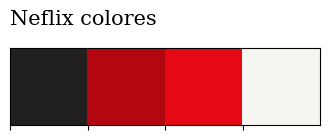

In [ ]:
# Paleta de colores de marca de Netflix
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

# Título con Matplotlib
plt.title("Neflix colores", loc='left', fontfamily='serif', fontsize=15, y=1.2)

# Mostrar gráfico
plt.show()

### a) Grafico circular: Según el tipo

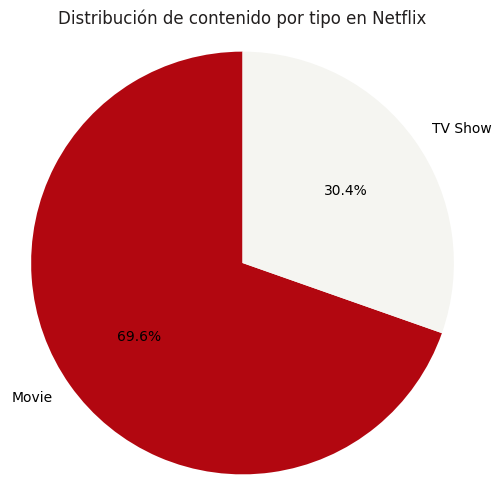

In [ ]:
# Contar ocurrencias de cada tipo
conteo_tipos = neflix['type'].value_counts()

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_tipos.values,
    labels=conteo_tipos.index,
    colors=['#b20710', '#f5f5f1'],
    autopct='%1.1f%%',
    startangle=90
)


plt.title('Distribución de contenido por tipo en Netflix', color='#221f1f')
plt.axis('equal')
plt.show()

### b) Gráfico área: Evolucion en el tiempo Contenido Agregado

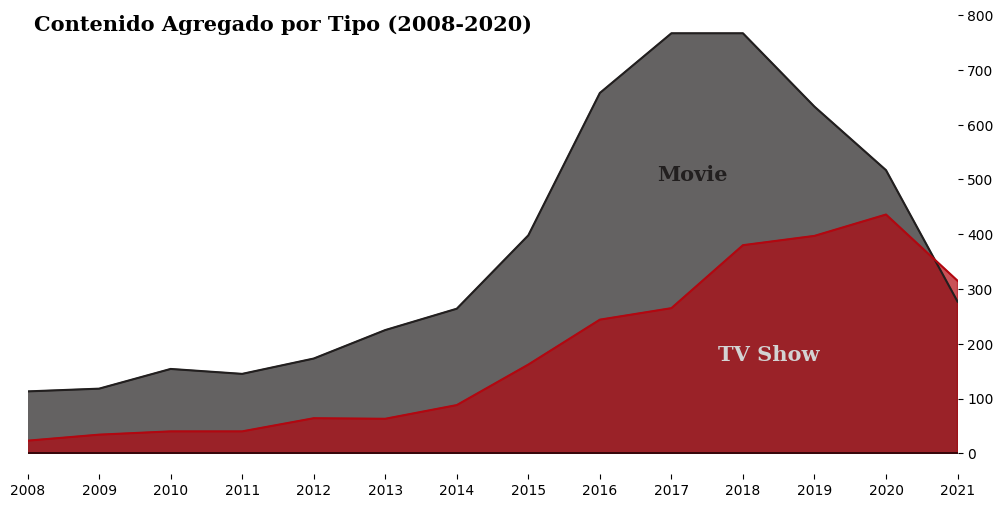

In [ ]:
# Obtener los tipos principales (películas y series)
neflix_tipo = neflix['type'].value_counts().index[:2]

# Definir colores para cada tipo
colors = ["#221f1f", "#b20710"]

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Bucle para graficar cada tipo (Movie y TV Show)
for i, type in enumerate(neflix_tipo):

    # Contar cantidad por año para ese tipo (release_year) -> value_counts()
    # sort_index() --> ordenar de formar cronologica
    country_data = neflix[neflix['type'] == type]['release_year'].value_counts().sort_index()

    # ax.plot --> Dibujar la linea del grafico
    ax.plot(country_data.index, country_data.values, color=colors[i], label=type)

    # ax.fill_between --> Rellena el área debajo de la línea
    ax.fill_between(country_data.index, 0, country_data.values, color=colors[i], alpha=0.7)

# Poner el eje "Y" a la derecha
ax.yaxis.tick_right()

# Línea horizontal base "X"
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Quitar bordes del gráfico
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Quitar la cuadrícula
ax.grid(False)

# Ajustar límites X, por ejemplo desde 2008 hasta 2020
ax.set_xlim(2008, 2021)
plt.xticks(np.arange(2008, 2022, 1))

# Texto del título y explicación
fig.text(0.13, 0.85, 'Contenido Agregado por Tipo (2008-2020)', fontsize=15, fontweight='bold', fontfamily='serif')

# Leyenda personalizada con colores
fig.text(0.65, 0.6, neflix_tipo[0], fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(0.70, 0.3, neflix_tipo[1], fontweight="bold", fontfamily='serif', fontsize=15, color='#d3d3d3')

plt.show()


In [ ]:
# Crear tabla tipo (Movie/TV Show) por año
tabla_tipo = pd.crosstab(neflix['release_year'], neflix['type'])

# Ordenar por año
tabla_contenido = tabla_tipo.sort_index()

# Mostrar la tabla
print(tabla_contenido)

type          Movie  TV Show
release_year                
1925              0        1
1942              2        0
1943              3        0
1944              3        0
1945              3        1
...             ...      ...
2017            767      265
2018            767      380
2019            633      397
2020            517      436
2021            277      315

[74 rows x 2 columns]


### c) Gráfico Barras: Los paises donde se produjo mayor contenido de Neflix

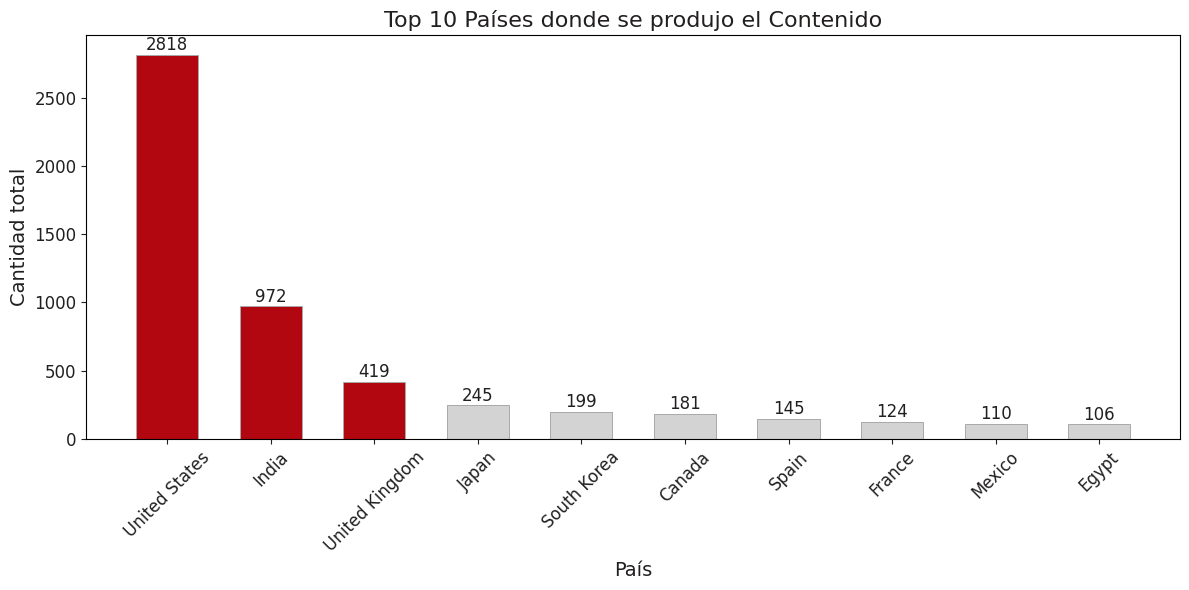

In [ ]:
# Eliminar registros con 'Desconocido' en la columna 'country'
neflix_country = neflix[neflix['country'] != 'Desconocido']

# Contar los 10 países más frecuentes
pais = neflix_country['country'].value_counts().sort_values(ascending=False)[:10]

# Definir colores: primeros 3 en rojo oscuro, el resto en gris claro
color_map = ['#b20710' if i < 3 else '#d3d3d3' for i in range(len(pais))]

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(pais.index, pais.values, width=0.6, edgecolor='darkgray', linewidth=0.7, color=color_map)

# Etiquetas con la cantidad encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='#221f1f')

# Estabilizar
ax.set_title('Top 10 Países donde se produjo el Contenido', fontsize=16, color='#221f1f')
ax.set_xlabel('País', fontsize=14, color='#221f1f')
ax.set_ylabel('Cantidad total', fontsize=14, color='#221f1f')
ax.tick_params(axis='x', rotation=45, labelsize=12, colors='#221f1f')
ax.tick_params(axis='y', labelsize=12, colors='#221f1f')

plt.tight_layout()
plt.show()


### d) Gráfico Barras Horizontal: Las Series de acuerdo a la Categoria o genero

In [ ]:
# Filtrar solo las Series
series = neflix[neflix['type'] == 'TV Show']
top_series = series['listed_in'].value_counts().head(10)  # Top 10
top_series

,count
listed_in,
Kids' TV,220
"International TV Shows, TV Dramas",121
"Crime TV Shows, International TV Shows, TV Dramas",110
"Kids' TV, TV Comedies",99
Reality TV,95
"International TV Shows, Romantic TV Shows, TV Comedies",94
"International TV Shows, Romantic TV Shows, TV Dramas",90
"Anime Series, International TV Shows",88
Docuseries,85


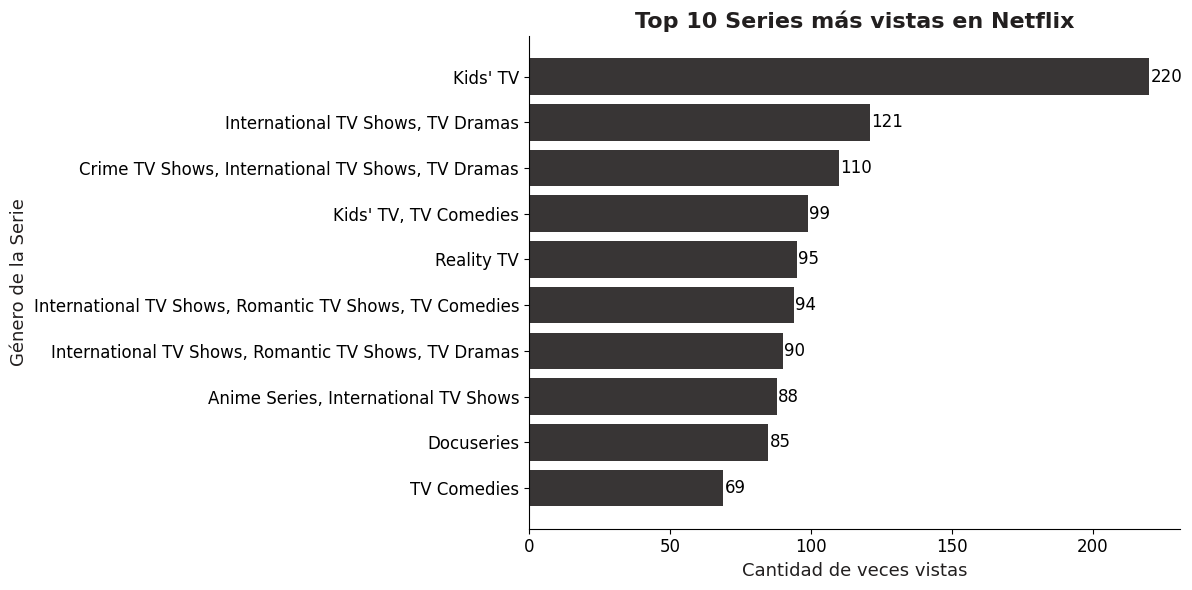

In [ ]:
# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras horizontales
ax.barh(top_series.index[::-1], top_series.values[::-1], color='#221f1f', alpha=0.9)

# Etiquetas y estilo
ax.set_title('Top 10 Series más vistas en Netflix', fontsize=16, fontweight='bold', color='#221f1f')
ax.set_xlabel('Cantidad de veces vistas', fontsize=13, color='#221f1f')
ax.set_ylabel('Género de la Serie', fontsize=13, color='#221f1f')

# Mostrar los valores a la derecha de cada barra
for i, v in enumerate(top_series.values[::-1]):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Estilo del gráfico
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


### e) Gráfico Barras Horizontal: Las Peliculas de acuerdo a la Categoria o genero

In [ ]:
# Filtrar solo las Peliculas
peliculas = neflix[neflix['type'] == 'Movie']

top_peliculas =peliculas['listed_in'].value_counts().head(10)  # Top 10
top_peliculas

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186
"Dramas, International Movies, Romantic Movies",180


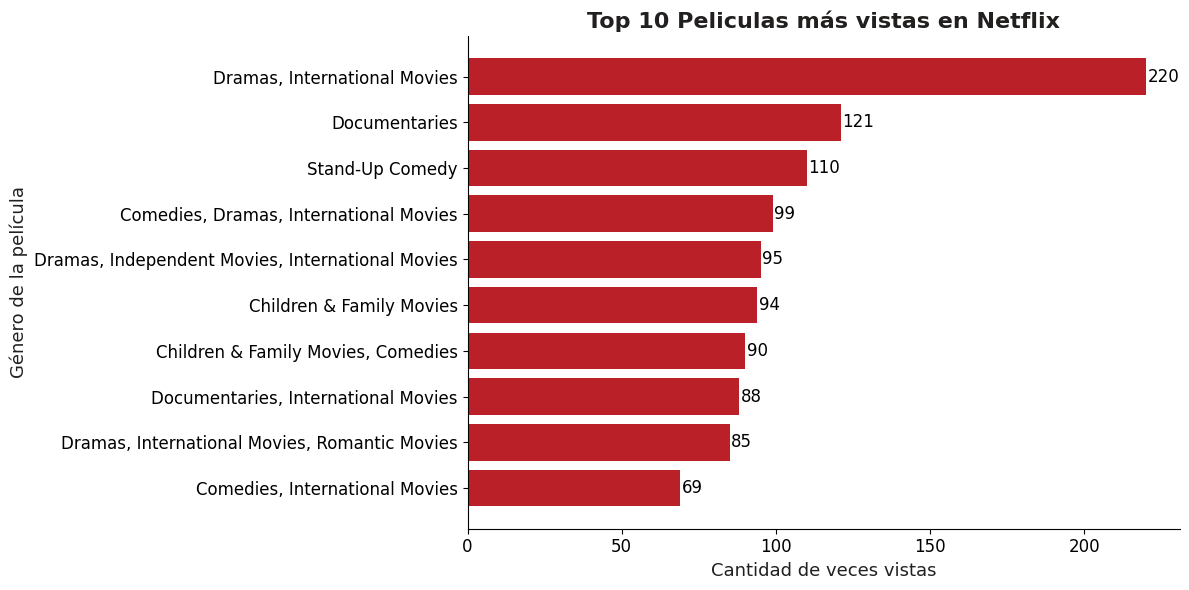

In [ ]:

# Gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras horizontales
ax.barh(top_peliculas.index[::-1], top_series.values[::-1], color='#b20710', alpha=0.9)

# Etiquetas y estilo
ax.set_title('Top 10 Peliculas más vistas en Netflix', fontsize=16, fontweight='bold', color='#221f1f')
ax.set_xlabel('Cantidad de veces vistas', fontsize=13, color='#221f1f')
ax.set_ylabel('Género de la película', fontsize=13, color='#221f1f')

# Mostrar los valores a la derecha de cada barra
for i, v in enumerate(top_series.values[::-1]):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Estilo del gráfico
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


### f) Gráfico treemap: Las Temporadas más frecuentes

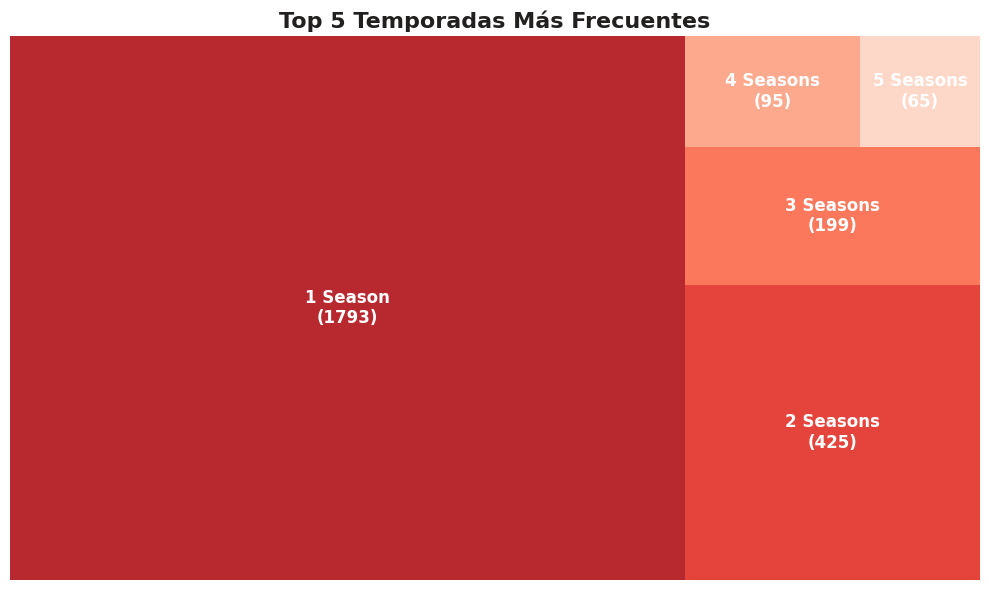

In [ ]:
# Filtrar solo TV Shows con duración válida
temporadas = neflix[(neflix['type'] == 'TV Show') & (neflix['duration'].str.contains('Season'))]
# primero filtar solo TV shows
# .str.contains('Season') --> Contiene el texto "Season" (puede ser "Season" o "Seasons")
# 1 Season, 2 Seasons, 3 Seasons --> entonces asi se considera los dos tipos

# Contar temporadas más frecuentes
season_counts = temporadas['duration'].value_counts().sort_values(ascending=False).head(5)
#.sort_values(ascending=False)--> ordenar de mayor a menor
# head(5) --> 5 primeros

# Crear un degradado de color
palette = sns.color_palette("Reds", len(season_counts)).as_hex()

# Crear gráfico treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=season_counts.values, #sizes = tamaño -> conteo
    #etiquetas dentro del rectangulo
    label=[f"{label}\n({count})" for label, count in zip(season_counts.index, season_counts.values)],
    color=palette[::-1],  # Invertir los colores para que el más fuerte sea primero
    alpha=0.9, # transparencia
    text_kwargs={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
) # fontsise -> tamaño ==== weight -> negrita ==== color -> letra

# Título y limpieza
plt.title('Top 5 Temporadas Más Frecuentes', fontsize=16, fontweight='bold', color='#221f1f')
# fontsize tamaño de la fuente
plt.axis('off') # desactivar el eje de los graficos
plt.tight_layout()
plt.show()

### g) Gráfico treemap: Las Peliculas por Minutos más frecuentes

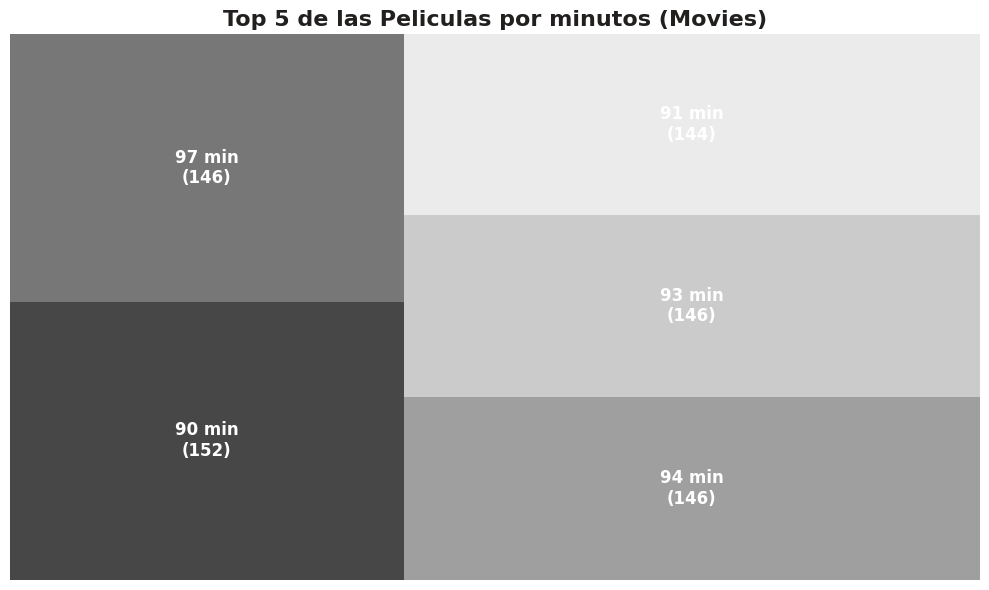

In [ ]:
# Filtrar solo por Peliculas con respectiva a la duracion
minutos = neflix[(neflix['type'] == 'Movie') & (neflix['duration'].str.contains('min'))]

# Contar duracion de minutos mas frecuentes
contar = minutos["duration"].value_counts().sort_values(ascending=False).head(5)

# Crear una paleta de colores
palette = sns.color_palette("Greys", len(contar)).as_hex()

# Crear gráfico treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=contar.values,
    label=[f"{label}\n({count})" for label, count in zip(contar.index, contar.values)],
    color=palette[::-1],
    alpha=0.9,
    text_kwargs={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)

# Título y limpieza
plt.title('Top 5 de las Peliculas por minutos (Movies)', fontsize=16, fontweight='bold', color='#221f1f')
plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ 5. Conclusiones

## **Predominio de las películas en la plataforma**
### El tipo de contenido más frecuente en Netflix son las películas, las cuales representan el 69.6% del total. Esto demuestra una clara preferencia y mayor relevancia de este formato en comparación con los programas de televisión.

## **Evolución temporal del contenido**
### Tanto las películas como los programas de televisión experimentaron un crecimiento sostenido desde 2008 hasta 2019. Sin embargo, en los años 2020 y 2021 se observó una disminución en la incorporación de nuevos títulos, debido a las dificultades en los rodajes provocadas por la pandemia de COVID-19.

##**Países con mayor presencia de contenido**
### Estados Unidos lidera la producción de contenido disponible en Netflix, con 2,818 títulos, lo que refleja su papel predominante en el mercado audiovisual de la plataforma. Le siguen India (972 títulos) y el Reino Unido (419 títulos), aunque con una participación considerablemente menor.

## **Géneros más relevantes en programas de TV**
### El género más destacado dentro de los programas de televisión es el de contenido infantil ("Kids"), con un total de 220 títulos. Esto indica una alta demanda por parte del público infantil y juvenil. Además, se observa que la mayoría de estos programas cuentan con solo una temporada.

## **Géneros más destacados en películas**
### En el caso de las películas, el género con mayor presencia es el drama internacional, con 220 títulos, seguido por los documentales (121) y las comedias (110). En cuanto a la duración, la mayoría de las películas oscila entre los 90 y 97 minutos.

## **Tendencias generales de la plataforma**
### En resumen, el análisis exploratorio de los datos de Netflix hasta 2021 evidencia una tendencia clara hacia el predominio de las películas, una evolución significativa en la oferta de contenido a lo largo del tiempo, y patrones definidos en cuanto a géneros y duración. Estos hallazgos permiten comprender mejor la estrategia de contenido de la plataforma y las preferencias de su audiencia.